In [ ]:
import pandas as pd
full_data = pd.read_csv('/content/Weather Training Data.csv')
full_data.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [ ]:
full_data.shape

(99516, 23)

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

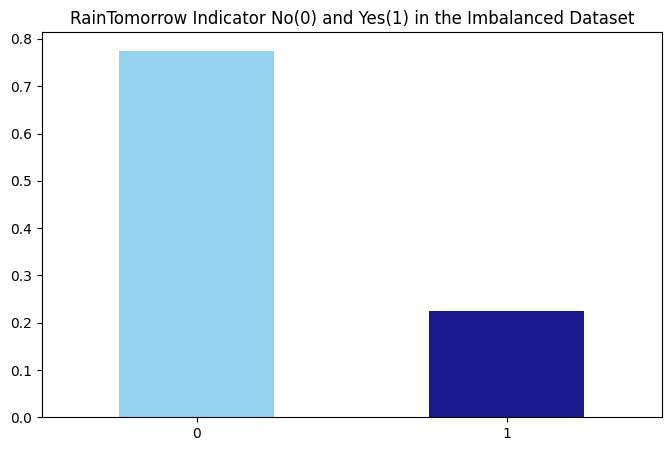

In [ ]:
#Imbalanced Dataset
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

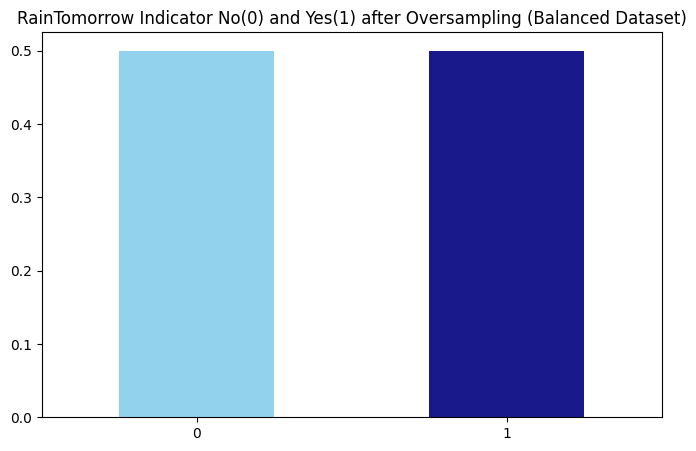

In [ ]:
#After Oversample
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

<Axes: >

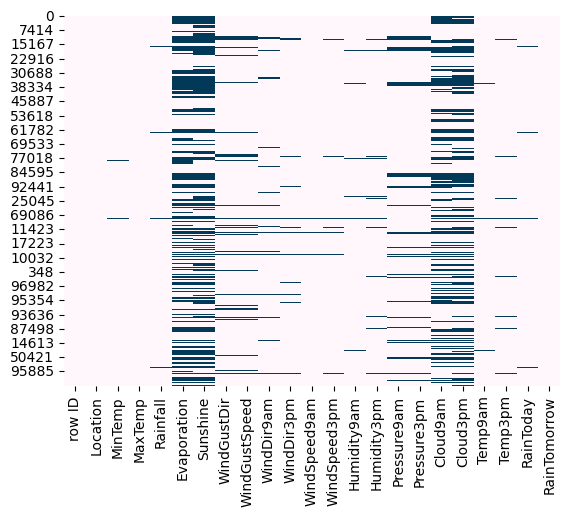

In [ ]:
#Missing Datamodel
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [ ]:
#Missing data less than 50
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,72952,0.472750
Evaporation,66540,0.431199
Cloud3pm,59971,0.388630
Cloud9am,57061,0.369772


In [ ]:
oversampled.select_dtypes(include=['object']).columns

Index(['row ID', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')

In [ ]:
# Impute categorical var with Mode
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

row ID           49272.750000
Location            25.000000
MinTemp              9.200000
MaxTemp             10.200000
Rainfall             2.600000
Evaporation          4.086582
Sunshine             5.800000
WindGustDir          9.000000
WindGustSpeed       19.000000
WindDir9am           8.000000
WindDir3pm           8.000000
WindSpeed9am        13.000000
WindSpeed3pm        11.000000
Humidity9am         26.000000
Humidity3pm         30.000000
Pressure9am          8.600000
Pressure3pm          8.600000
Cloud9am             4.000000
Cloud3pm             3.481298
Temp9am              9.288125
Temp3pm              9.700000
RainToday            1.000000
RainTomorrow         1.000000
dtype: float64


In [ ]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(118380, 23)

<Axes: >

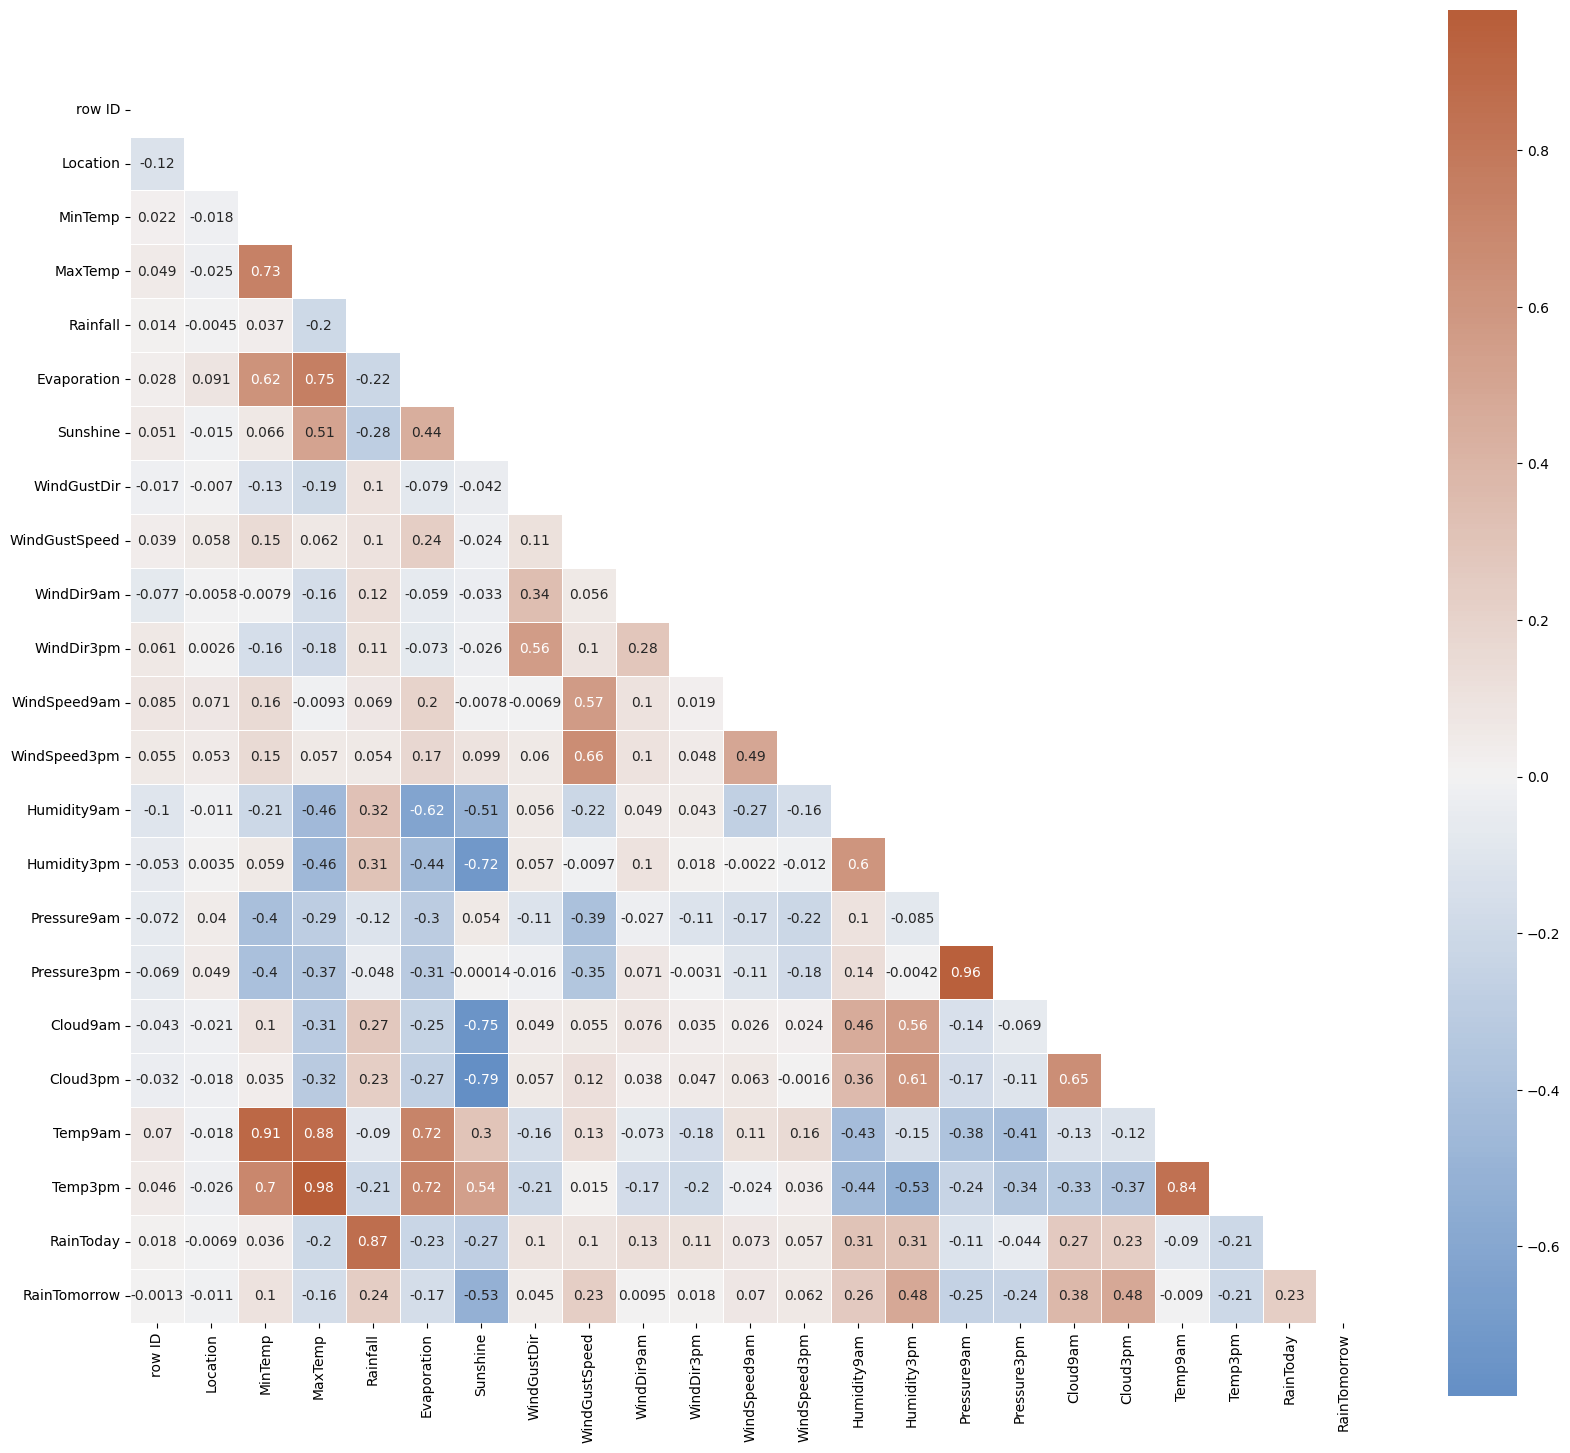

In [ ]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [ ]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [ ]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.0392767  0.02698755 0.03338182 0.03214341 0.02123227 0.03261805
 0.13349096 0.02046165 0.04351881 0.02133385 0.02215463 0.02210758
 0.02323457 0.03559129 0.11293926 0.04474919 0.06336734 0.05260635
 0.1438647  0.0323119  0.03564145 0.00698666]


In [ ]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(features, target)

In [ ]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [ ]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
        
    return model, accuracy, roc_auc, coh_kap, time_taken

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

0.8971004030560067
Accuracy = 0.896950009023642
ROC Area under Curve = 0.8969036403378161
Cohen's Kappa = 0.7938803701393354
Time taken = 2.123971939086914
              precision    recall  f1-score   support

         0.0    0.91813   0.87121   0.89406     16593
         1.0    0.87789   0.92260   0.89969     16653

    accuracy                        0.89695     33246
   macro avg    0.89801   0.89690   0.89687     33246
weighted avg    0.89798   0.89695   0.89688     33246



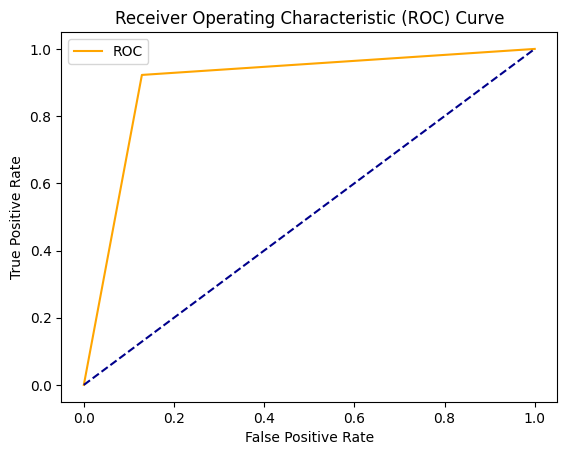

In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictions = dt.predict(X_test)
print(accuracy_score(y_test, predictions))
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(dt, X_train, y_train, X_test, y_test)

0.95364855922517
Accuracy = 0.9545810022258316
ROC Area under Curve = 0.9545468723514373
Cohen's Kappa = 0.9091555344445431
Time taken = 30.966992139816284
              precision    recall  f1-score   support

         0.0    0.97232   0.93564   0.95362     16593
         1.0    0.93819   0.97346   0.95550     16653

    accuracy                        0.95458     33246
   macro avg    0.95525   0.95455   0.95456     33246
weighted avg    0.95522   0.95458   0.95456     33246



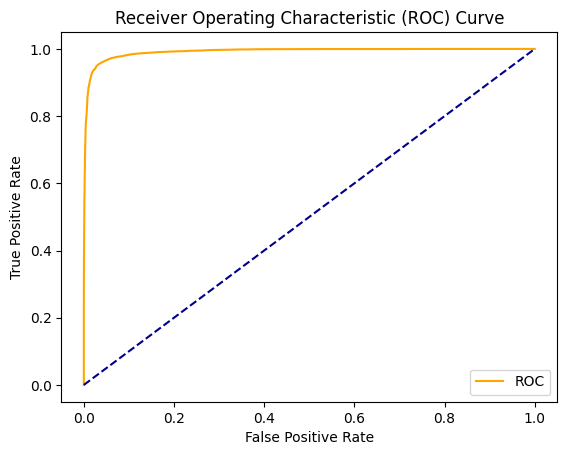

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
print(accuracy_score(y_test, predictions))
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(rf, X_train, y_train, X_test, y_test)

0.8411237442098297
Accuracy = 0.8411237442098297
ROC Area under Curve = 0.8410976045738088
Cohen's Kappa = 0.6822301695786901
Time taken = 4261.164703845978
              precision    recall  f1-score   support

         0.0    0.85082   0.82661   0.83854     16593
         1.0    0.83200   0.85558   0.84363     16653

    accuracy                        0.84112     33246
   macro avg    0.84141   0.84110   0.84108     33246
weighted avg    0.84139   0.84112   0.84109     33246



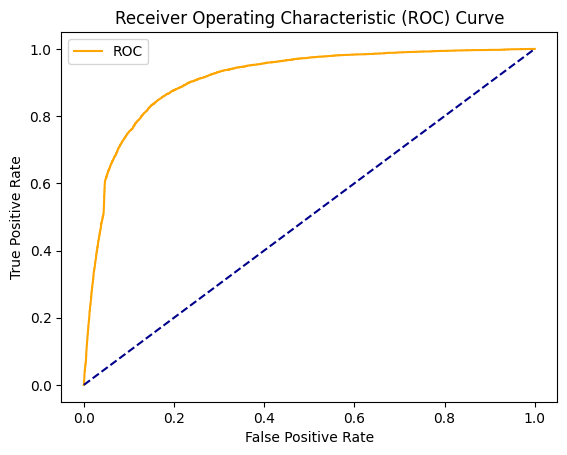

In [ ]:
#SVM
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(accuracy_score(y_test, predictions))
model_svm, accuracy_svm, roc_auc_svm, coh_kap_svm, tt_svm = run_model(svm, X_train, y_train, X_test, y_test)

0.7936593875955003
Accuracy = 0.7936593875955003
ROC Area under Curve = 0.7936872690496825
Cohen's Kappa = 0.5873409967971623
Time taken = 0.6954741477966309
              precision    recall  f1-score   support

         0.0    0.78427   0.80914   0.79651     16593
         1.0    0.80362   0.77824   0.79073     16653

    accuracy                        0.79366     33246
   macro avg    0.79395   0.79369   0.79362     33246
weighted avg    0.79397   0.79366   0.79361     33246



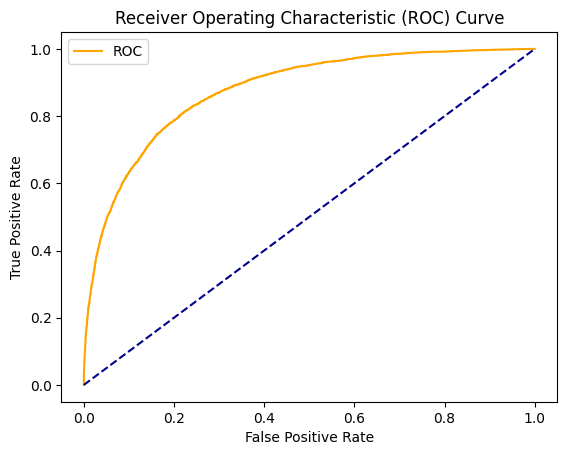

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(accuracy_score(y_test, predictions))
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(lr, X_train, y_train, X_test, y_test)

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM ,Dropout,GRU

In [ ]:
# reshape the data to fit the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:

# create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Add another LSTM layer with 50 units and 20% dropout
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(X_train, y_train, epochs=50, batch_size=16)

"""# evaluate the model on the test set
loss, acc = model.evaluate(X_test, y_test)"""

Epoch 1/50
6234/6234 [==============================] - 71s 10ms/step - loss: 0.4460 - accuracy: 0.7933
Epoch 2/50
6234/6234 [==============================] - 57s 9ms/step - loss: 0.4229 - accuracy: 0.8051
Epoch 3/50
6234/6234 [==============================] - 59s 9ms/step - loss: 0.3949 - accuracy: 0.8224
Epoch 4/50
6234/6234 [==============================] - 61s 10ms/step - loss: 0.3603 - accuracy: 0.8396
Epoch 5/50
6234/6234 [==============================] - 61s 10ms/step - loss: 0.3409 - accuracy: 0.8480
Epoch 6/50
6234/6234 [==============================] - 61s 10ms/step - loss: 0.3311 - accuracy: 0.8526
Epoch 7/50
6234/6234 [==============================] - 63s 10ms/step - loss: 0.3227 - accuracy: 0.8558
Epoch 8/50
6234/6234 [==============================] - 58s 9ms/step - loss: 0.3164 - accuracy: 0.8582
Epoch 9/50
6234/6234 [==============================] - 58s 9ms/step - loss: 0.3113 - accuracy: 0.8609
Epoch 10/50
6234/6234 [==============================] - 60s 10ms/st

'# evaluate the model on the test set\nloss, acc = model.evaluate(X_test, y_test)'

In [ ]:
# create the LSTM model
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train.shape[2])))
model1.add(Dropout(0.2))
model1.add(LSTM(units=50, return_sequences=True))
model1.add(Dropout(0.2))
# Add another LSTM layer with 50 units and 20% dropout
model1.add(GRU(units=50, return_sequences=True))
model1.add(Dropout(0.2))

model1.add(GRU(units=50))
model1.add(Dropout(0.2))

model1.add(Dense(units=1, activation='sigmoid'))

# compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model1.fit(X_train, y_train, epochs=50, batch_size=16)

"""# evaluate the model on the test set
loss, acc = model.evaluate(X_test, y_test)"""

Epoch 1/50
6234/6234 [==============================] - 70s 10ms/step - loss: 0.4461 - accuracy: 0.7928
Epoch 2/50
6234/6234 [==============================] - 62s 10ms/step - loss: 0.4256 - accuracy: 0.8046
Epoch 3/50
6234/6234 [==============================] - 61s 10ms/step - loss: 0.4013 - accuracy: 0.8189
Epoch 4/50
6234/6234 [==============================] - 62s 10ms/step - loss: 0.3627 - accuracy: 0.8382
Epoch 5/50
6234/6234 [==============================] - 60s 10ms/step - loss: 0.3406 - accuracy: 0.8490
Epoch 6/50
6234/6234 [==============================] - 60s 10ms/step - loss: 0.3306 - accuracy: 0.8534
Epoch 7/50
6234/6234 [==============================] - 60s 10ms/step - loss: 0.3221 - accuracy: 0.8570
Epoch 8/50
6234/6234 [==============================] - 60s 10ms/step - loss: 0.3148 - accuracy: 0.8598
Epoch 9/50
6234/6234 [==============================] - 60s 10ms/step - loss: 0.3052 - accuracy: 0.8637
Epoch 10/50
6234/6234 [==============================] - 59s 9ms

'# evaluate the model on the test set\nloss, acc = model.evaluate(X_test, y_test)'